In [180]:
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
from scrapy.http import TextResponse
import time
import matplotlib.pylab as plt
from IPython.display import display,Markdown

In [185]:
location_name , house_name , house_price = search_real_estate()
len(location_name) , len(house_name) , len(house_price)

(37606, 37606, 37606)

In [186]:
import pandas as pd
df = pd.DataFrame()
df['location_name'] = location_name
df['house_name'] = house_name
df['house_price'] = house_price

In [187]:
tuned_df = tuning_df(df)

37606

In [188]:
display(tuned_df.tail())
display(tuned_df.describe())

,location_name,house_name,house_price
37601,중랑구,신내8단지두산화성,22000
37602,중랑구,신내7단지진로,43000
37603,중랑구,신내4단지,2000
37604,중랑구,신내9단지진흥,33500
37605,중랑구,중화동양엔파트,42000


,house_price
count,37606.000000
mean,63597.467292
std,57022.111988
min,0.000000
25%,30000.000000
50%,50000.000000
75%,77000.000000
max,850000.000000


In [190]:
tuned_df.shape

(37606, 3)

In [194]:
for i in list(set(tuned_df['location_name'])):
    globals()[str(i)+'_df'] = df[df['location_name'] == i]

In [213]:
name_ls , mean_ls = [],[]
for i in list(set(tuned_df['location_name'])):
    name_ls.append(i)
    mean_ls.append(globals()[str(i)+'_df'].describe().iloc[1][0])

In [229]:
len(name_ls),len(mean_ls)

(25, 25)

In [232]:
import matplotlib as mpl
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

In [236]:
import numpy as np

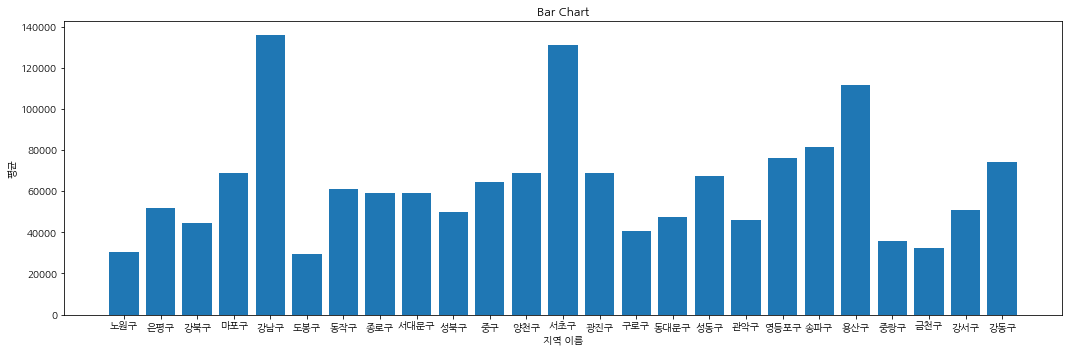

In [238]:
import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(15,5))
y = mean_ls
x = np.arange(len(y))
xlabel = name_ls
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel("지역 이름")
plt.ylabel("평균")
plt.tight_layout()

In [189]:
tuned_df.to_csv('seoul_land_df.csv',index=False)